In [5]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *
import copy
import math
%matplotlib inline

In [7]:
def load():
    x = np.array([ 6.1101,  5.5277,  8.5186,  7.0032,  5.8598,  8.3829,  7.4764,
         8.5781,  6.4862,  5.0546,  5.7107, 14.164 ,  5.734 ,  8.4084,
         5.6407,  5.3794,  6.3654,  5.1301,  6.4296,  7.0708,  6.1891,
        20.27  ,  5.4901,  6.3261,  5.5649, 18.945 , 12.828 , 10.957 ,
        13.176 , 22.203 ,  5.2524,  6.5894,  9.2482,  5.8918,  8.2111,
         7.9334,  8.0959,  5.6063, 12.836 ,  6.3534,  5.4069,  6.8825,
        11.708 ,  5.7737,  7.8247,  7.0931,  5.0702,  5.8014, 11.7   ,
         5.5416,  7.5402,  5.3077,  7.4239,  7.6031,  6.3328,  6.3589,
         6.2742,  5.6397,  9.3102,  9.4536,  8.8254,  5.1793, 21.279 ,
        14.908 , 18.959 ,  7.2182,  8.2951, 10.236 ,  5.4994, 20.341 ,
        10.136 ,  7.3345,  6.0062,  7.2259,  5.0269,  6.5479,  7.5386,
         5.0365, 10.274 ,  5.1077,  5.7292,  5.1884,  6.3557,  9.7687,
         6.5159,  8.5172,  9.1802,  6.002 ,  5.5204,  5.0594,  5.7077,
         7.6366,  5.8707,  5.3054,  8.2934, 13.394 ,  5.4369])
    y = np.array([17.592  ,  9.1302 , 13.662  , 11.854  ,  6.8233 , 11.886  ,
         4.3483 , 12.     ,  6.5987 ,  3.8166 ,  3.2522 , 15.505  ,
         3.1551 ,  7.2258 ,  0.71618,  3.5129 ,  5.3048 ,  0.56077,
         3.6518 ,  5.3893 ,  3.1386 , 21.767  ,  4.263  ,  5.1875 ,
         3.0825 , 22.638  , 13.501  ,  7.0467 , 14.692  , 24.147  ,
        -1.22   ,  5.9966 , 12.134  ,  1.8495 ,  6.5426 ,  4.5623 ,
         4.1164 ,  3.3928 , 10.117  ,  5.4974 ,  0.55657,  3.9115 ,
         5.3854 ,  2.4406 ,  6.7318 ,  1.0463 ,  5.1337 ,  1.844  ,
         8.0043 ,  1.0179 ,  6.7504 ,  1.8396 ,  4.2885 ,  4.9981 ,
         1.4233 , -1.4211 ,  2.4756 ,  4.6042 ,  3.9624 ,  5.4141 ,
         5.1694 , -0.74279, 17.929  , 12.054  , 17.054  ,  4.8852 ,
         5.7442 ,  7.7754 ,  1.0173 , 20.992  ,  6.6799 ,  4.0259 ,
         1.2784 ,  3.3411 , -2.6807 ,  0.29678,  3.8845 ,  5.7014 ,
         6.7526 ,  2.0576 ,  0.47953,  0.20421,  0.67861,  7.5435 ,
         5.3436 ,  4.2415 ,  6.7981 ,  0.92695,  0.152  ,  2.8214 ,
         1.8451 ,  4.2959 ,  7.2029 ,  1.9869 ,  0.14454,  9.0551 ,
         0.61705])
    return x, y

In [8]:
x_train, y_train = load()

In [11]:
x_train[:5]

In [12]:
type(x_train)

numpy.ndarray

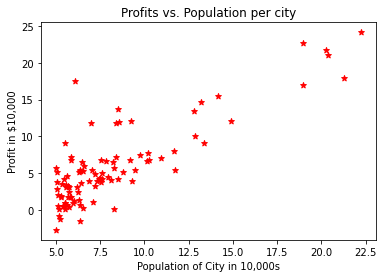

In [16]:
plt.scatter(x_train, y_train, marker='*', c='r')

# Set the title
plt.title("Profits vs. Population per city")
# Set the y-axis label
plt.ylabel('Profit in $10,000')
# Set the x-axis label
plt.xlabel('Population of City in 10,000s')
plt.show()

In [21]:
def compute_cost(x, y, w, b):
    """
    Compute cost
    return total_cost
    """
    m = x.shape[0]
    cost = 0
    for i in range(m):
        f_wb = w * x[i] + b
        cost += (f_wb - y[i]) ** 2
    total_cost = (1 / (2 * m)) * cost
    
    return total_cost

In [25]:
initial_w = 2
initial_b = 1

fcost = compute_cost(x_train, y_train, initial_w, initial_b)
print(f'Cost for initial w : {fcost: .3f}')

Cost for initial w :  75.203


In [28]:
def compute_gradient(x, y, w, b):
    """
    return dj_dw, dj_db
    """
    m = x.shape[0]

    dj_dw = 0
    dj_db = 0
    for i in range(m):
        f_wb = x[i] * w + b
        dj_dw += (f_wb - y[i]) * x[i]
        dj_db += f_wb -y[i]
    
    return dj_dw / m, dj_db / m

In [29]:
initial_w = 0
initial_b = 0

tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, initial_w, initial_b)
print('Gradients at initial Zeros (w, b): ', tmp_dj_dw, tmp_dj_db)

Gradients at initial Zeros (w, b):  -65.32884974555672 -5.83913505154639


In [31]:
test_w = 0.2
test_b = 0.2

test_dj_dw, test_dj_db = compute_gradient(x_train, y_train, test_w, test_b)
print('Gradients at test (w, b): ', test_dj_dw, test_dj_db)

Gradients at test (w, b):  -47.41610118114435 -4.007175051546391


In [34]:
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    """
    return w, b
    """
    m = x.shape[0]
    J_History = []
    w_History = []
    w = copy.deepcopy(w_in)
    b = b_in

    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(x, y, w, b)
        w = w - (alpha * dj_dw)
        b = b - (alpha * dj_db)

        if i < 100000:
            cost = cost_function(x, y, w, b)
            J_History.append(cost)

        if i % math.ceil(num_iters / 10) == 0:
            w_History.append(w)
            print(f'Interation {i : 4} : Cost {float(J_History[-1]) : 8.2f}')
    return w, b, J_History, w_History

In [36]:
initial_w = 0
initial_b = 0
iterations = 1500
alpha = 0.01
w, b, _, _ = gradient_descent(x_train, y_train, initial_w, initial_b, compute_cost, compute_gradient, alpha, iterations)
print('w, b found by gradient descent is: ', w, b)

Interation    0 : Cost     6.74
Interation  150 : Cost     5.31
Interation  300 : Cost     4.96
Interation  450 : Cost     4.76
Interation  600 : Cost     4.64
Interation  750 : Cost     4.57
Interation  900 : Cost     4.53
Interation  1050 : Cost     4.51
Interation  1200 : Cost     4.50
Interation  1350 : Cost     4.49
w, b found by gradient descent is:  1.166362350335582 -3.63029143940436


In [39]:
m = x_train.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w * x_train[i] + b

Text(0.5, 0, 'Population of City in 10,000s')

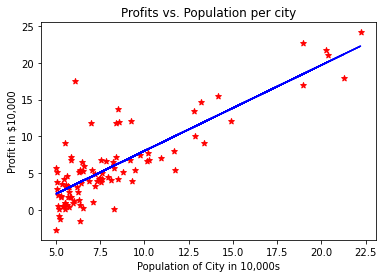

In [40]:
plt.plot(x_train, predicted, c='b')
plt.scatter(x_train, y_train, marker='*', c='r')
# Set the title
plt.title("Profits vs. Population per city")
# Set the y-axis label
plt.ylabel('Profit in $10,000')
# Set the x-axis label
plt.xlabel('Population of City in 10,000s')

Your final values of $w,b$ can also be used to make predictions on profits. Let's predict what the profit would be in areas of 35,000 and 70,000 people. 

- The model takes in population of a city in 10,000s as input. 

- Therefore, 35,000 people can be translated into an input to the model as `np.array([3.5])`

- Similarly, 70,000 people can be translated into an input to the model as `np.array([7.])`

In [45]:
predict1 = 3.5 * w + b
print(f'For population = 35,000, we predict a profit of ${predict1*10000:.2f}')
predict2 = 7.0 * w + b
print(f'For population = 70,000, we predict a profit of ${predict2*10000:.2f}')

For population = 35,000, we predict a profit of $4519.77
For population = 70,000, we predict a profit of $45342.45
